# DataScientest - SalesData Project
Last Updated: 20.06.2023

## 1. Data import & first analysis
#### 1.1 Import of all neccesarry modules

In [1]:
#TEST GITHub

print('Hallo')

Hallo


In [1]:
# Append new Modules here:    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
#CH Have to import requests
import requests

#### 1.2 Import of df and first informations

Further descriptions of the columns and rows can be found in __[SalesData-Description.xlsx](https://bdae0-my.sharepoint.com/:x:/r/personal/jonathan_leipold_bdae-gruppe_de/Documents/DataScientest/Sales-Project/SalesData-Description.xlsx?d=wc46862516c97407cbb63550cda70df39&csf=1&web=1&e=HffTcl)__

In [2]:
#import df. set encoding to 'latin-1' necassary to fit to csv-file
df = pd.read_csv('SalesDate-Example.csv',encoding='latin-1')

pd.set_option('display.max_columns', None) #allow display of all columns
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte


#### 1.3 Column Informations:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230010 entries, 0 to 230009
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Indicator            230010 non-null  object 
 1   status_code          230010 non-null  object 
 2   status_name          230010 non-null  object 
 3   BirthDate            230010 non-null  object 
 4   Nation               228444 non-null  object 
 5   AgeAtPremium         230010 non-null  int64  
 6   PolicyAgeAtPremium   230010 non-null  int64  
 7   premium_startDate    230010 non-null  object 
 8   premium_endDate      230010 non-null  object 
 9   policy_StartDate     230010 non-null  object 
 10  policy_EffEndDate    230010 non-null  object 
 11  premiumAmount        230010 non-null  float64
 12  FeeAmount            230010 non-null  float64
 13  feeRate              229984 non-null  object 
 14  ContractID           230010 non-null  object 
 15  product_code     

<div class="alert alert-block alert-info">
<b>Observation:</b>date columns have dtype 'object' --> change to datetime
</div>

- Therefore we wrote a function called 'convert_columns_to_datetime' and put it into the 'helpers.py' file in the same notebook
- This way the main notebook stays more clear
- Other helpers functions will follow

In [6]:
from helpers import convert_columns_to_datetime
#help(convert_columns_to_datetime) #Description of the function -> uncomment, if needed

In [7]:
columns_to_convert = ['BirthDate','premium_startDate', 'premium_endDate', 'policy_StartDate', 'policy_EffEndDate']

df = convert_columns_to_datetime(df, columns_to_convert)
print(df.dtypes)
df.head()

Indicator                      object
status_code                    object
status_name                    object
BirthDate              datetime64[ns]
Nation                         object
AgeAtPremium                    int64
PolicyAgeAtPremium              int64
premium_startDate      datetime64[ns]
premium_endDate        datetime64[ns]
policy_StartDate       datetime64[ns]
policy_EffEndDate      datetime64[ns]
premiumAmount                 float64
FeeAmount                     float64
feeRate                        object
ContractID                     object
product_code                   object
MainProductCode                object
MainProductName                object
Deductible                    float64
CmpPrivate                     object
Model                           int64
Zone                            int64
ZoneDesc                       object
premium_Country                object
premium_CountryName            object
product_group                   int64
product_grou

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte


#### 1.4 Description of numerical columns:

In [8]:
df.describe()

,BirthDate,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,Deductible,Model,Zone,product_group
count,230010,230010.000000,230010.000000,230010,230010,230010,230010,230010.000000,230010.000000,230010.0,230010.000000,230010.000000,230010.000000
mean,1979-02-12 01:35:16.426242336,39.724521,1.104213,2019-05-04 19:14:29.503065088,2019-06-03 05:31:40.435632896,2017-10-14 11:12:15.025433856,2021-01-12 01:24:42.728577024,69.794634,27.769139,0.0,1003.744094,1005.093796,100.088692
min,1948-01-10 00:00:00,-1.000000,-1.000000,2014-11-01 00:00:00,2014-11-30 00:00:00,2013-03-01 00:00:00,2014-07-31 00:00:00,-425.000000,-165.750000,0.0,1001.000000,-1.000000,100.000000
25%,1967-04-05 00:00:00,30.000000,0.000000,2017-04-01 00:00:00,2017-04-30 00:00:00,2015-08-01 00:00:00,2018-08-31 00:00:00,79.000000,31.600000,0.0,1001.000000,1002.000000,100.000000
50%,1979-04-04 00:00:00,39.000000,1.000000,2019-05-01 00:00:00,2019-05-31 00:00:00,2017-08-13 12:00:00,2020-10-31 00:00:00,83.000000,33.200000,0.0,1001.000000,1004.000000,100.000000
75%,1988-11-09 00:00:00,52.000000,2.000000,2021-07-01 00:00:00,2021-07-31 00:00:00,2020-01-01 00:00:00,2023-01-31 00:00:00,88.000000,35.200000,0.0,1008.000000,1009.000000,100.000000
max,2023-01-25 00:00:00,66.000000,4.000000,2023-12-01 00:00:00,2023-12-31 00:00:00,2023-08-30 00:00:00,2028-07-31 00:00:00,425.000000,165.750000,0.0,1008.000000,1010.000000,102.000000
std,NaN,14.845829,1.273986,NaN,NaN,NaN,NaN,61.198797,24.342121,0.0,3.417405,11.147499,0.411726


<div class="alert alert-block alert-info">
<b>Observation:</b> Deductible has only value 0 (this is due to the fact, that we only look at one product and that this product offers only deuctible = 0).
</div>

#### 1.5 Evaluation of NaN-Values
columns with NaN-values: Nation (= Nationality), Premium_Country(Name), feeRate
--> check Nation & Country first

In [9]:
#Nation
df['Nation'].value_counts(dropna=False)
NaN_Nations = df['Nation'].isna().sum()/len(df)
print('Part of NaN-values in Nation column = {:.1%}'.format(NaN_Nations))

#have a look on rows with NaN Nations
df[df['Nation'].isna() == True]

Part of NaN-values in Nation column = 0.7%


,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName
346,P,P,Bezahlt,1963-04-16,NaN,54,3,2018-02-01,2018-02-28,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
347,P,P,Bezahlt,1963-04-16,NaN,55,3,2018-05-01,2018-05-31,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
348,P,P,Bezahlt,1963-04-16,NaN,55,3,2018-08-01,2018-08-31,2014-10-01,2019-09-30,83.0,33.20,40%,p7599,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ES,Spain,100,Produkte
985,P,P,Bezahlt,1978-04-04,NaN,40,0,2018-12-01,2018-12-31,2018-02-01,2020-05-31,79.0,31.60,40%,p16831,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte
1035,P,P,Bezahlt,1978-04-04,NaN,40,0,2018-10-01,2018-10-31,2018-02-01,2020-05-31,79.0,31.60,40%,p16831,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228190,P,P,Bezahlt,1959-01-07,NaN,63,0,2022-05-01,2022-05-31,2022-01-01,2022-05-31,-97.0,-37.83,39%,p29844,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,BR,Brazil,100,Produkte
228546,P,P,Bezahlt,1961-06-15,NaN,59,0,2021-04-01,2021-04-30,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte
228547,P,P,Bezahlt,1961-06-15,NaN,60,0,2021-07-01,2021-07-31,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte
228548,P,P,Bezahlt,1961-06-15,NaN,60,0,2021-10-01,2021-10-31,2020-11-01,2025-10-31,88.0,35.20,40%,p25935,Q055.006.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte


**Idea:** Built function to further analyse rows with NaN values in specific input column and run on columns above
1. Output: Compare to the rest of df by graphs to might recognize similarities (premium Country / policy_StartDate / CmpPrivate / ...) 
2. if not: Set to dummie value 'XX' to keep rest of rows informations

In [10]:
#Import Function from helpers.py
from helpers import NaN_col_info
#help(NaN_col_info) #uncomment for disctiption, if neccesarry

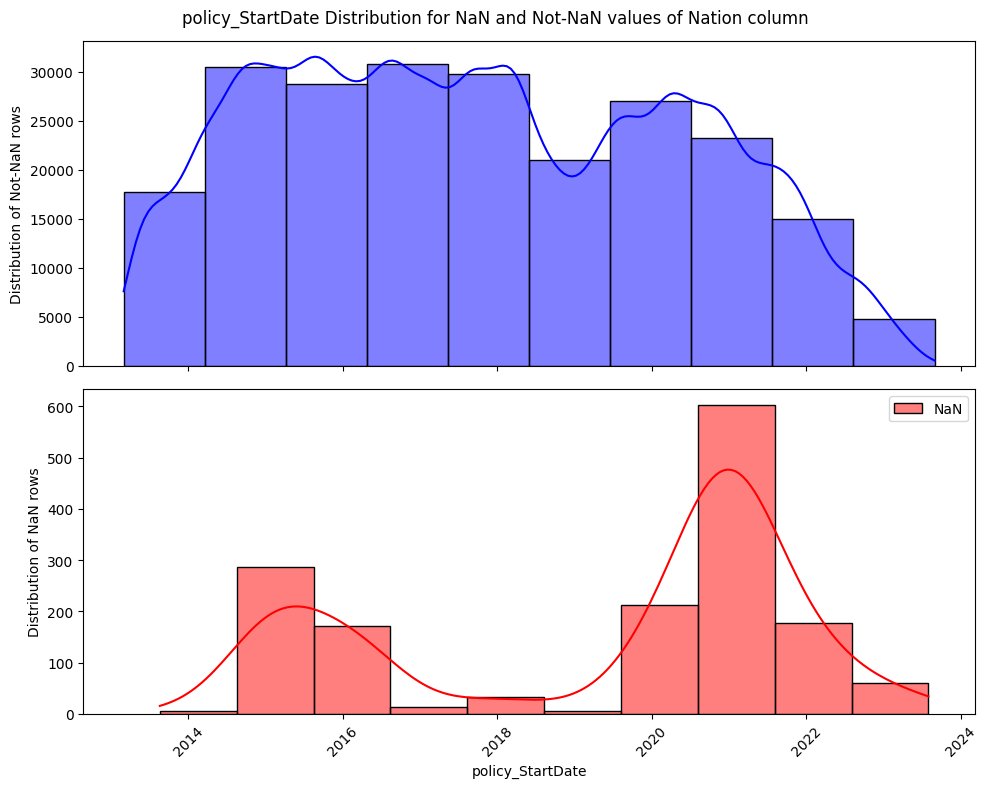

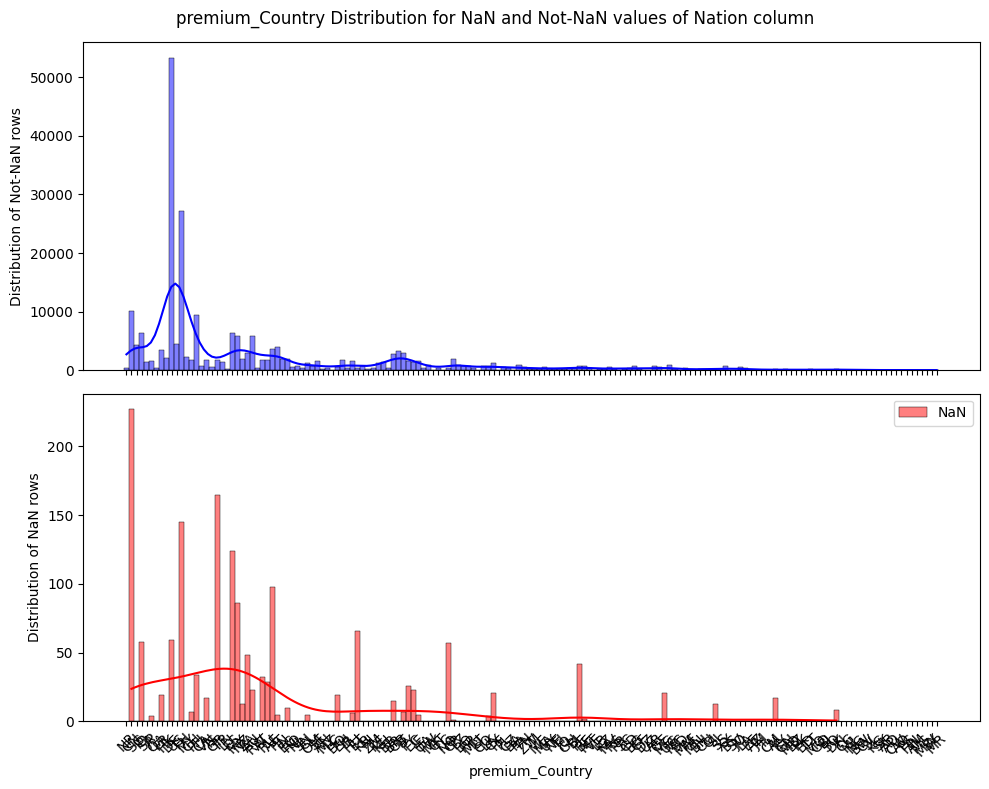

In [11]:
#NaN_col_info(df, 'Nation','premium_startDate')
NaN_col_info(df, 'Nation','policy_StartDate')
#NaN_col_info(df, 'Nation','premiumAmount')
NaN_col_info(df, 'Nation','premium_Country')

Alternative function to plot both distributions in 1 plot, one for each input columns

In [12]:
from helpers import plot_distributions

In [13]:
#example
nan_col = 'Nation'
comp_cols = ['premium_Country','policy_StartDate']  # Add other columns as needed
#plot_distributions(df, nan_col, comp_cols)

<div class="alert alert-block alert-info">
<b>Observation:</b> 
<ul>
    <li>Missing value in Nation column are more likely in recent policies / premiums.</li>
    <li>Distribution of premium Country is different for NaN-Nations, but too many countries for comparison. </li> 
</ul>
</div>

A closer look on relplot betwwen nation & premiumCountry is difficult due to too many countries. <br>
As well too many values for discriptive column to later create dummy-values for modelling.

<div class="alert alert-block alert-warning">
<b>Therefore: Create Clusters of Regions and map the countries to it's regions.</b><br>
(Special Features: 'DE' as seperate region (because most commmon) and 'XX' (because = unknown))
</div>

import 2 functions to get unique country names and map them to their corresponding region

In [14]:
from helpers import get_unique_values, generate_country_region_mapping

1. get unqiue countries

In [15]:
unique_countries = get_unique_values(df, columns=['Nation', 'premium_Country'])

2. map regions

In [16]:
country_mapping = generate_country_region_mapping(unique_countries)
print("Country to Region Mapping of DE:", country_mapping['DE']) #test

Country to Region Mapping of DE: DE


3. create new columns in df

In [17]:
df['Nation_region'] = df['Nation'].map(country_mapping)
print(df[['Nation','Nation_region']]['Nation_region'].value_counts(dropna=False),'\n')

df['premiumCountry_region'] = df['premium_Country'].map(country_mapping)
print(df[['premium_Country','premiumCountry_region']]['premiumCountry_region'].value_counts(dropna=False))

Nation_region
DE          140291
Europe       71580
Asia          7888
Americas      6278
NaN           1566
Africa        1363
Oceania       1044
Name: count, dtype: int64 

premiumCountry_region
Asia        82486
DE          53383
Europe      40693
Americas    26552
Africa      15626
Oceania      7832
NaN          2724
XX            712
Polar           2
Name: count, dtype: int64


<div class="alert alert-block alert-info">
    Idea: Set NaN to 'XX' in both colums.
</div>

In [18]:
#fill NaN values with 'XX'
df[['Nation','Nation_region','premium_Country','premiumCountry_region']] = df[['Nation','Nation_region','premium_Country','premiumCountry_region']].fillna('XX')

#check result
print(df[['Nation','Nation_region']]['Nation_region'].value_counts(dropna=False),'\n')
print(df[['premium_Country','premiumCountry_region']]['premiumCountry_region'].value_counts(dropna=False))

Nation_region
DE          140291
Europe       71580
Asia          7888
Americas      6278
XX            1566
Africa        1363
Oceania       1044
Name: count, dtype: int64 

premiumCountry_region
Asia        82486
DE          53383
Europe      40693
Americas    26552
Africa      15626
Oceania      7832
XX           3436
Polar           2
Name: count, dtype: int64


#### show new df

In [19]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte,DE,Asia
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia


## Still ToDo

<div class="alert alert-block alert-success">
<b>Main preprocessing Goal:</b> Create df where rows are crouped by Months.<br>
     Therefore we need:
    <ul>
        <li>a "Month" column with MM-YYY</li>  
        <li>create our <b> target value(s):</b> sum premiumAmmount, count ContractID </li>
        <li>to decide what to do with other columns</li>   
    </ul>
</div>

<div class="alert alert-block alert-warning">
<b>Next Step for understanding:</b> premiumStart & -End always in the same month? --> check duration of premium Payments
<ol>
<li> create column with premiumDuration = premium_endDate-premium_StartDate </li> 
<li> value_counts of new premiumDuration </li> 
</ol>
    
Then find out how rows can be grouped by month.
</div>

<div class="alert alert-block alert-warning">
<b>Then:</b> Check behaviour of "Storniert" Status
<ol>
<li> Take Example ContractIDs with 'status_code' = 'S' and see how it behaves compared to 'P'. </li> 
<li> Decide how to handle it when grouping premiums. </li> 
</ol>
</div>

<div class="alert alert-block alert-warning">
<b>Therefore:</b> Group lines in different ways as df and plot graphically
<ol>
    <li> by month -->  sum premiumAmount, count ContractID & decide for other columns if necessary (This will be our df for modelling). </li>
    <li> try different other groupings for overview (Nation_Region, ...) and explore diferences</li>
</ol>
</div>

## 2 Explorative Analyse Basic CH

In [20]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte,DE,Asia
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia


#### Countplot of the status_name

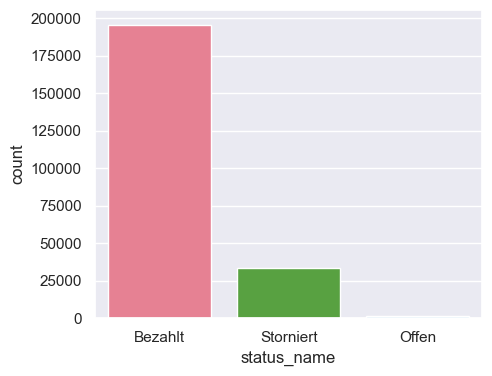

In [21]:
fig = plt.figure(figsize=(5,4))
sns.set()
sns.countplot(x='status_name',data=df,palette='husl')
plt.show;

#### Countplot of the Customer Nation

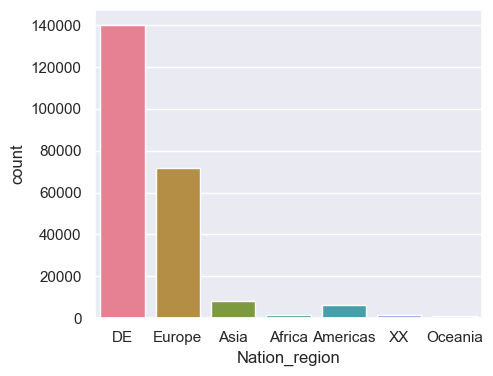

In [22]:
fig = plt.figure(figsize=(5,4))
sns.set()
sns.countplot(x='Nation_region',data=df,palette='husl')
plt.show;

#### Displot of the Age of the Customer

<Figure size 1000x400 with 0 Axes>

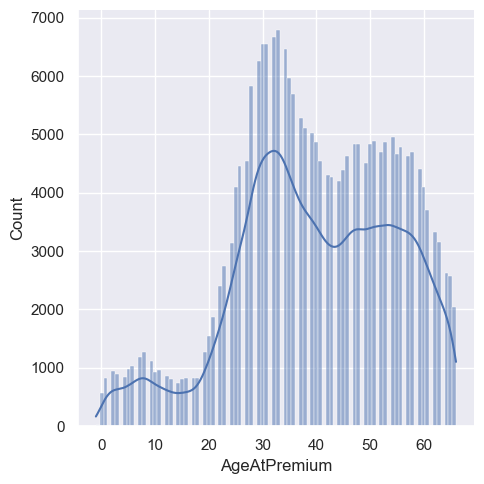

In [23]:
fig = plt.figure(figsize=(10,4))
sns.set()
sns.displot(x='AgeAtPremium',data=df,kde=True)
plt.show;

<div class="alert alert-block alert-warning">
Age of -1 ? 
</div>

#### Creating AgeGroups

In [24]:
bins = [0, 18, 30, 40, 50, 60, float('inf')]
labels = ['<18', '18-29', '30-39', '40-49', '50-59', '>60']

# Wende die 'cut'-Funktion an, um die Altersgruppen zu erstellen
df['AgeGroup'] = pd.cut(df['AgeAtPremium'], bins=bins, labels=labels, right=False)

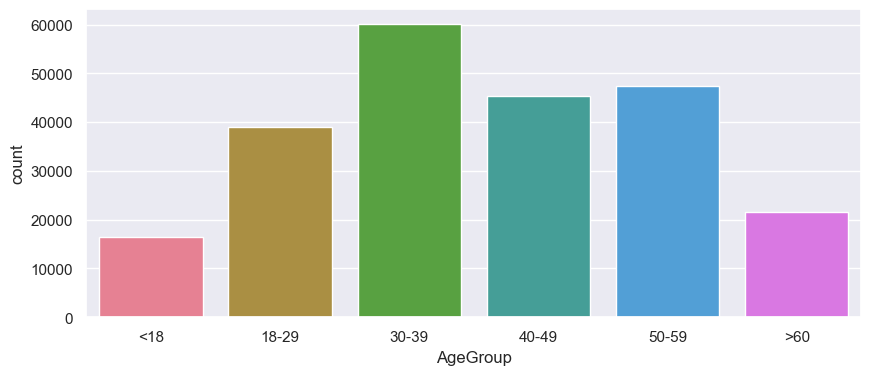

In [25]:
fig = plt.figure(figsize=(10,4))
sns.set()
sns.countplot(x='AgeGroup',data=df,palette='husl')
plt.show;

#### Days between premiumStartDate and premium AndDate

In [26]:
df['time_period'] = (df['premium_endDate'] - df['premium_startDate']).dt.days

In [27]:
df['time_period'].value_counts()

time_period
30    133058
29     78423
27     14209
28      4214
0         28
14        14
9          7
26         6
23         5
21         5
19         5
20         4
7          4
1          4
25         4
15         4
22         3
2          2
18         2
16         2
17         2
8          2
24         1
5          1
11         1
Name: count, dtype: int64

<div class="alert alert-block alert-warning">
First step. Only time_period > 26??
</div>

In [28]:
df['MonthYear'] = df['premium_startDate']

#### Deskriptive Analyse

In [29]:
df.groupby('MonthYear')[['premiumAmount','FeeAmount']].sum()

,premiumAmount,FeeAmount
MonthYear,,
2014-11-01,106331.0,42532.40
2014-12-01,108247.0,43298.80
2015-01-01,109588.0,43835.20
2015-02-01,113145.0,45258.00
2015-03-01,117688.0,47075.20
...,...,...
2023-08-01,73557.0,28687.23
2023-09-01,72008.0,28083.12
2023-10-01,70262.0,27402.18


In [92]:
df_sorted = df.sort_values(by='MonthYear')

In [93]:
df_sorted.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names,Month_Year,Year
100859,P,P,Bezahlt,1982-06-13,RO,32,0,2014-11-01,2014-11-30,2014-09-16,2014-11-30,79.0,31.6,40%,p7553,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43754,P,P,Bezahlt,1970-08-16,DE,44,0,2014-11-01,2014-11-30,2014-04-01,2019-03-31,79.0,31.6,40%,p6286,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,EC,Ecuador,100,Produkte,DE,Americas,40-49,29,2014-11-01,11,2014,Nov,2014-11,2014
57380,P,P,Bezahlt,1982-02-09,RO,32,0,2014-11-01,2014-11-30,2014-03-20,2017-08-31,79.0,31.6,40%,p6458,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43742,P,P,Bezahlt,1982-11-24,DE,31,0,2014-11-01,2014-11-30,2014-09-01,2015-02-28,79.0,31.6,40%,p7403,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,AE,United Arab Emirates,100,Produkte,DE,Asia,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
38835,P,P,Bezahlt,1988-03-12,DE,26,0,2014-11-01,2014-11-30,2014-08-19,2016-01-31,79.0,31.6,40%,p7330,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,DK,Denmark,100,Produkte,DE,Europe,18-29,29,2014-11-01,11,2014,Nov,2014-11,2014


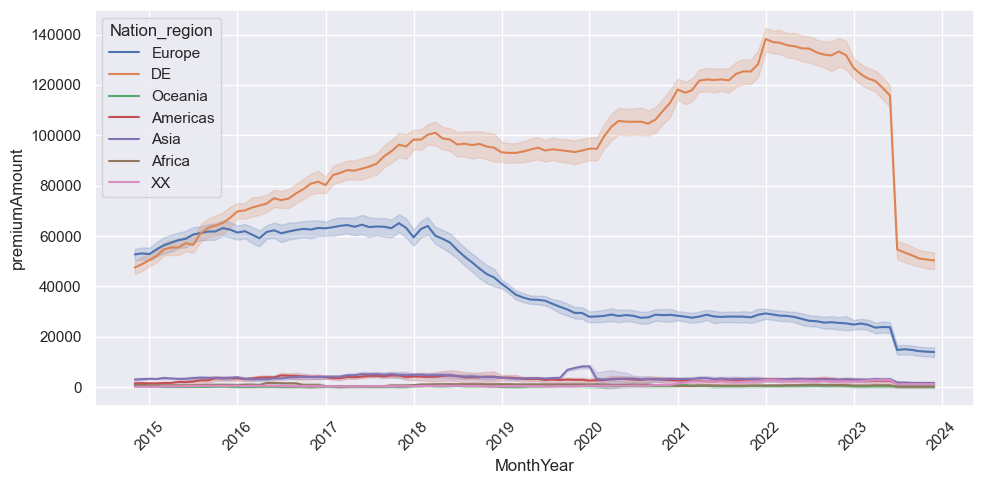

In [91]:
plt.figure(figsize=(10,5))
sns.lineplot(x='MonthYear',y='premiumAmount',data=df_sorted,estimator='sum',hue='Nation_region')
plt.xticks(rotation=45)
plt.tight_layout();

In [32]:
last_3_years = df_sorted[(df_sorted['MonthYear']>'2020') & (df_sorted['MonthYear']<'2024')]

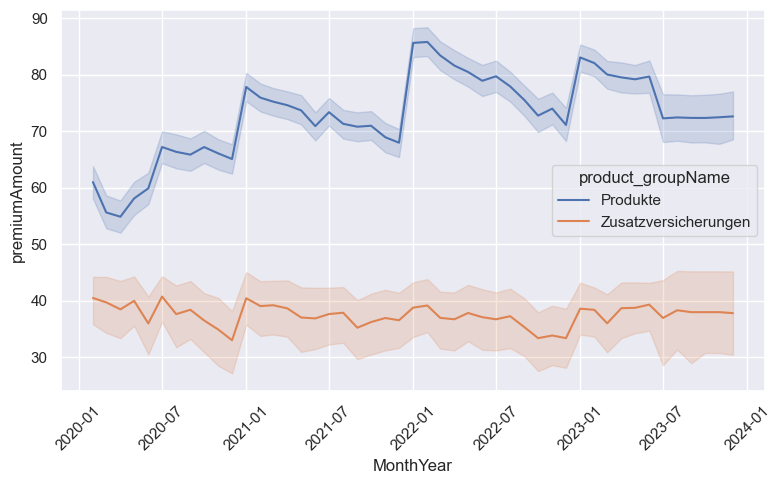

In [33]:
plt.figure(figsize=(8,5))
sns.lineplot(x='MonthYear',y='premiumAmount',data=last_3_years,hue='product_groupName')
plt.xticks(rotation=45)
plt.tight_layout();

In [34]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear
0,P,P,Bezahlt,1956-03-12,DE,62,1,2018-08-01,2018-08-31,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia,>60,30,2018-08-01
1,P,P,Bezahlt,1956-03-12,DE,62,1,2018-10-01,2018-10-31,2017-08-01,2019-07-31,83.0,33.2,40%,p16174,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,100,Produkte,DE,Asia,>60,30,2018-10-01
2,P,P,Bezahlt,1956-03-12,DE,62,1,2018-11-01,2018-11-30,2017-08-01,2019-07-31,47.0,18.8,40%,p16174,Q055.003.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,NP,Nepal,102,Zusatzversicherungen,DE,Asia,>60,29,2018-11-01
3,P,S,Storniert,1979-08-25,DE,39,2,2018-11-01,2018-11-30,2016-11-01,2018-01-31,83.0,33.2,40%,p13934,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia,30-39,29,2018-11-01
4,P,P,Bezahlt,1986-02-04,FR,32,1,2018-03-01,2018-03-31,2016-05-01,2018-12-31,83.0,33.2,40%,p12569,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia,30-39,30,2018-03-01


In [35]:
df['month'] = df['premium_startDate'].dt.month
df['year'] = df['premium_startDate'].dt.year

In [36]:
monats_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Monatsnamen in der 'Monat' Spalte ändern
df['month_names'] = df['month'].map(monats_mapping)


In [37]:
df = df.sort_values(by='premium_startDate')

In [38]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names
100859,P,P,Bezahlt,1982-06-13,RO,32,0,2014-11-01,2014-11-30,2014-09-16,2014-11-30,79.0,31.6,40%,p7553,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov
43742,P,P,Bezahlt,1982-11-24,DE,31,0,2014-11-01,2014-11-30,2014-09-01,2015-02-28,79.0,31.6,40%,p7403,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,AE,United Arab Emirates,100,Produkte,DE,Asia,30-39,29,2014-11-01,11,2014,Nov
38835,P,P,Bezahlt,1988-03-12,DE,26,0,2014-11-01,2014-11-30,2014-08-19,2016-01-31,79.0,31.6,40%,p7330,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,DK,Denmark,100,Produkte,DE,Europe,18-29,29,2014-11-01,11,2014,Nov
41261,P,P,Bezahlt,1982-03-31,DE,32,0,2014-11-01,2014-11-30,2014-04-10,2019-03-31,79.0,31.6,40%,p6505,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,MX,Mexico,100,Produkte,DE,Americas,30-39,29,2014-11-01,11,2014,Nov
41260,P,P,Bezahlt,1986-03-07,PL,28,0,2014-11-01,2014-11-30,2013-12-01,2017-11-30,79.0,31.6,40%,p5663,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,18-29,29,2014-11-01,11,2014,Nov


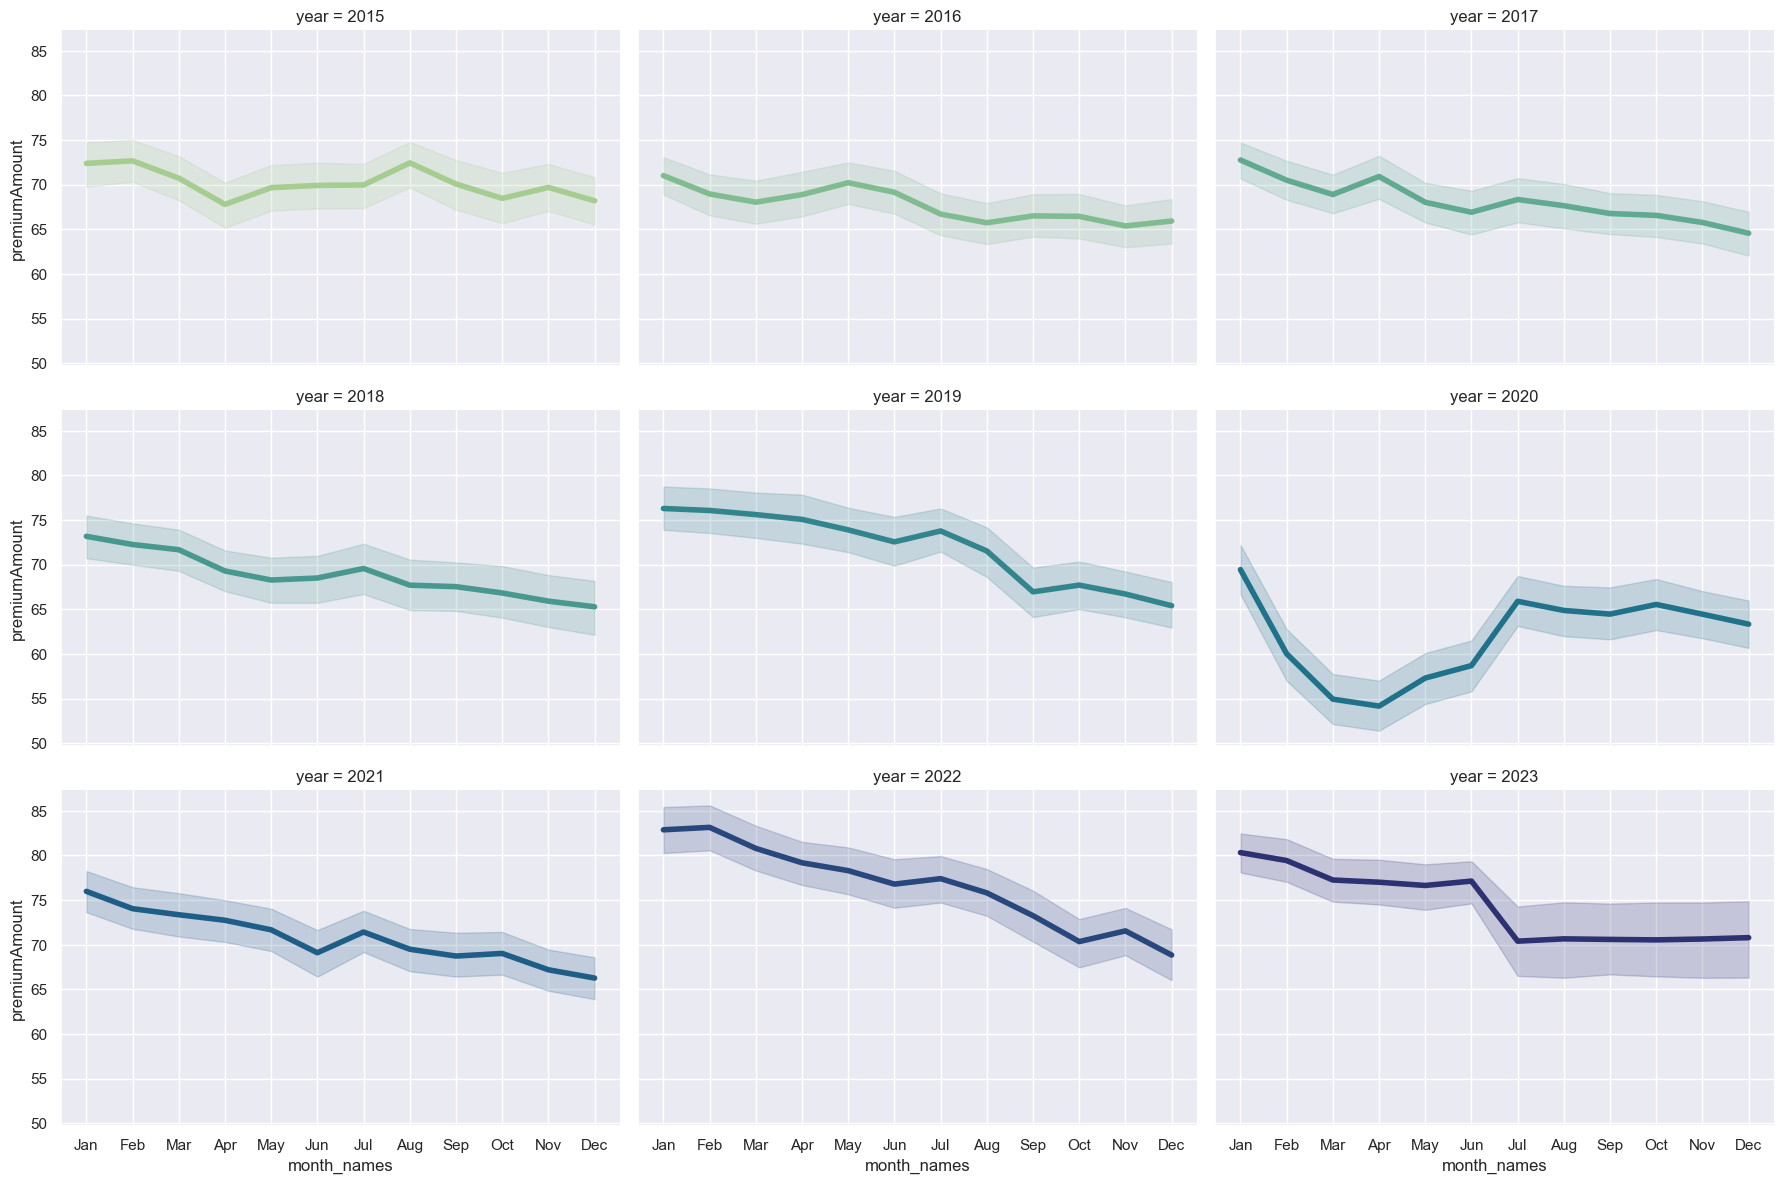

In [39]:
# Plot each year's time series in its own facet

g = sns.relplot(
    data=df[df['MonthYear']>='01.01.2015'],
    x="month_names", y="premiumAmount", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=False
)


#### Checking Status Code P and S

In [41]:
df[df['status_code']=='P']['premiumAmount'].describe()

count    195860.000000
mean         81.338175
std          42.868086
min        -425.000000
25%          79.000000
50%          83.000000
75%          88.000000
max         425.000000
Name: premiumAmount, dtype: float64

In [42]:
df[df['status_code']=='P']['premiumAmount'].describe()

count    195860.000000
mean         81.338175
std          42.868086
min        -425.000000
25%          79.000000
50%          83.000000
75%          88.000000
max         425.000000
Name: premiumAmount, dtype: float64

In [43]:
df_payed = df[df['status_code']=='P']

perc_neg = len(df_payed[df_payed['premiumAmount']<0])/len(df_payed['premiumAmount'])*100

print(str(perc_neg)+'% of the payed transactions are neg.')

3.047074440927193% of the payed transactions are neg.


In [44]:
df_storno = df[df['status_code']=='S']

perc_neg = len(df_storno[df_storno['premiumAmount']<0])/len(df_storno[df_storno['premiumAmount']>0])*100
print(str(perc_neg)+'% of the storno transactions are neg.')

98.60535016531409% of the storno transactions are neg.


<div class="alert alert-block alert-warning">
There are negative Transactions with Status P and positive Transactions with Status S. ???
</div>

## 3 Nan Values Step by Step

In [45]:
df.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names
100859,P,P,Bezahlt,1982-06-13,RO,32,0,2014-11-01,2014-11-30,2014-09-16,2014-11-30,79.0,31.6,40%,p7553,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov
43742,P,P,Bezahlt,1982-11-24,DE,31,0,2014-11-01,2014-11-30,2014-09-01,2015-02-28,79.0,31.6,40%,p7403,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,AE,United Arab Emirates,100,Produkte,DE,Asia,30-39,29,2014-11-01,11,2014,Nov
38835,P,P,Bezahlt,1988-03-12,DE,26,0,2014-11-01,2014-11-30,2014-08-19,2016-01-31,79.0,31.6,40%,p7330,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,DK,Denmark,100,Produkte,DE,Europe,18-29,29,2014-11-01,11,2014,Nov
41261,P,P,Bezahlt,1982-03-31,DE,32,0,2014-11-01,2014-11-30,2014-04-10,2019-03-31,79.0,31.6,40%,p6505,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,MX,Mexico,100,Produkte,DE,Americas,30-39,29,2014-11-01,11,2014,Nov
41260,P,P,Bezahlt,1986-03-07,PL,28,0,2014-11-01,2014-11-30,2013-12-01,2017-11-30,79.0,31.6,40%,p5663,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,18-29,29,2014-11-01,11,2014,Nov


In [46]:
df.isna().sum()

Indicator                   0
status_code                 0
status_name                 0
BirthDate                   0
Nation                      0
AgeAtPremium                0
PolicyAgeAtPremium          0
premium_startDate           0
premium_endDate             0
policy_StartDate            0
policy_EffEndDate           0
premiumAmount               0
FeeAmount                   0
feeRate                    26
ContractID                  0
product_code                0
MainProductCode             0
MainProductName             0
Deductible                  0
CmpPrivate                  0
Model                       0
Zone                        0
ZoneDesc                   26
premium_Country             0
premium_CountryName      2065
product_group               0
product_groupName           0
Nation_region               0
premiumCountry_region       0
AgeGroup                   25
time_period                 0
MonthYear                   0
month                       0
year      

#### Fee Rate

In [47]:
df[df['feeRate'].isna()].head(10)

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names
37892,P,S,Storniert,1974-03-07,IT,48,-1,2022-12-01,2022-12-31,2023-02-01,2023-03-31,-97.0,0.0,NaN,p32222,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,Europe,XX,40-49,30,2022-12-01,12,2022,Dec
183928,P,S,Storniert,1974-03-07,IT,48,-1,2022-12-01,2022-12-31,2023-02-01,2023-03-31,97.0,0.0,NaN,p32222,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,Europe,XX,40-49,30,2022-12-01,12,2022,Dec
38663,P,S,Storniert,1996-12-20,DE,26,0,2023-01-01,2023-01-31,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-01-01,1,2023,Jan
37055,P,S,Storniert,1996-12-20,DE,26,0,2023-01-01,2023-01-31,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-01-01,1,2023,Jan
96103,P,S,Storniert,1996-12-20,DE,26,0,2023-02-01,2023-02-28,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,27,2023-02-01,2,2023,Feb
182210,P,S,Storniert,1996-12-20,DE,26,0,2023-02-01,2023-02-28,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,27,2023-02-01,2,2023,Feb
38139,P,S,Storniert,1996-12-20,DE,26,0,2023-03-01,2023-03-31,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-03-01,3,2023,Mar
37053,P,S,Storniert,1996-12-20,DE,26,0,2023-03-01,2023-03-31,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-03-01,3,2023,Mar
38664,P,S,Storniert,1996-12-20,DE,26,0,2023-04-01,2023-04-30,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,29,2023-04-01,4,2023,Apr
37056,P,S,Storniert,1996-12-20,DE,26,0,2023-04-01,2023-04-30,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,29,2023-04-01,4,2023,Apr


<div class="alert alert-block alert-warning">
nan
</div>

#### Zone Desc

In [48]:
df[df['ZoneDesc'].isna()].head(10)

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names
37892,P,S,Storniert,1974-03-07,IT,48,-1,2022-12-01,2022-12-31,2023-02-01,2023-03-31,-97.0,0.0,NaN,p32222,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,Europe,XX,40-49,30,2022-12-01,12,2022,Dec
183928,P,S,Storniert,1974-03-07,IT,48,-1,2022-12-01,2022-12-31,2023-02-01,2023-03-31,97.0,0.0,NaN,p32222,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,Europe,XX,40-49,30,2022-12-01,12,2022,Dec
38663,P,S,Storniert,1996-12-20,DE,26,0,2023-01-01,2023-01-31,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-01-01,1,2023,Jan
37055,P,S,Storniert,1996-12-20,DE,26,0,2023-01-01,2023-01-31,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-01-01,1,2023,Jan
96103,P,S,Storniert,1996-12-20,DE,26,0,2023-02-01,2023-02-28,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,27,2023-02-01,2,2023,Feb
182210,P,S,Storniert,1996-12-20,DE,26,0,2023-02-01,2023-02-28,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,27,2023-02-01,2,2023,Feb
38139,P,S,Storniert,1996-12-20,DE,26,0,2023-03-01,2023-03-31,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-03-01,3,2023,Mar
37053,P,S,Storniert,1996-12-20,DE,26,0,2023-03-01,2023-03-31,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,30,2023-03-01,3,2023,Mar
38664,P,S,Storniert,1996-12-20,DE,26,0,2023-04-01,2023-04-30,2023-01-01,2023-01-01,97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,29,2023-04-01,4,2023,Apr
37056,P,S,Storniert,1996-12-20,DE,26,0,2023-04-01,2023-04-30,2023-01-01,2023-01-01,-97.0,0.0,NaN,p32035,Q055.006.000,G007,Product6,0.0,I,1008,-1,NaN,XX,NaN,100,Produkte,DE,XX,18-29,29,2023-04-01,4,2023,Apr


#### Age Group

In [49]:
df[df['AgeGroup'].isna()].head(10)

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names
65150,P,P,Bezahlt,2015-01-05,DE,-1,-1,2015-01-01,2015-01-31,2015-01-05,2015-09-30,79.00,31.600,40%,p8882,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,CN,China,100,Produkte,DE,Asia,NaN,30,2015-01-01,1,2015,Jan
154598,P,P,Bezahlt,2015-04-10,DE,-1,-1,2015-04-01,2015-04-30,2015-04-10,2015-06-30,79.00,31.600,40%,p9692,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,FR,France,100,Produkte,DE,Europe,NaN,29,2015-04-01,4,2015,Apr
47883,P,P,Bezahlt,2015-08-21,DE,-1,-1,2015-08-01,2015-08-31,2015-08-21,2018-08-31,79.00,31.600,40%,p10802,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,HK,Hong Kong,100,Produkte,DE,Asia,NaN,30,2015-08-01,8,2015,Aug
167738,P,P,Bezahlt,2015-10-03,DE,-1,-1,2015-10-01,2015-10-31,2015-10-03,2016-12-31,79.00,31.600,40%,p11127,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,MY,Malaysia,100,Produkte,DE,Asia,NaN,30,2015-10-01,10,2015,Oct
44940,P,P,Bezahlt,2015-10-03,DE,-1,-1,2015-10-01,2015-10-31,2015-10-03,2016-12-31,81.37,32.548,40%,p11127,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,MY,Malaysia,100,Produkte,DE,Asia,NaN,30,2015-10-01,10,2015,Oct
44939,P,P,Bezahlt,2015-10-03,DE,-1,-1,2015-10-01,2015-10-31,2015-10-03,2016-12-31,-81.37,-32.548,40%,p11127,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,MY,Malaysia,100,Produkte,DE,Asia,NaN,30,2015-10-01,10,2015,Oct
116776,P,P,Bezahlt,2016-05-25,XX,-1,-1,2016-05-01,2016-05-31,2016-05-25,2018-10-31,79.00,31.600,40%,p12930,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,ZA,South Africa,100,Produkte,XX,Africa,NaN,30,2016-05-01,5,2016,May
134536,P,P,Bezahlt,2016-09-20,FI,-1,-1,2016-09-01,2016-09-30,2016-09-20,2018-12-31,79.00,31.600,40%,p14065,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,SG,Singapore,100,Produkte,Europe,Asia,NaN,29,2016-09-01,9,2016,Sep
134224,P,S,Storniert,2016-10-03,DE,-1,-1,2016-10-01,2016-10-31,2016-10-06,2016-10-06,-79.00,-31.600,40%,p14007,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,BR,Brazil,100,Produkte,DE,Americas,NaN,30,2016-10-01,10,2016,Oct
132383,P,P,Bezahlt,2016-10-03,DE,-1,-1,2016-10-01,2016-10-31,2016-10-03,2019-01-31,79.00,31.600,40%,p14041,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,BR,Brazil,100,Produkte,DE,Americas,NaN,30,2016-10-01,10,2016,Oct


### How many transactions per month

In [50]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

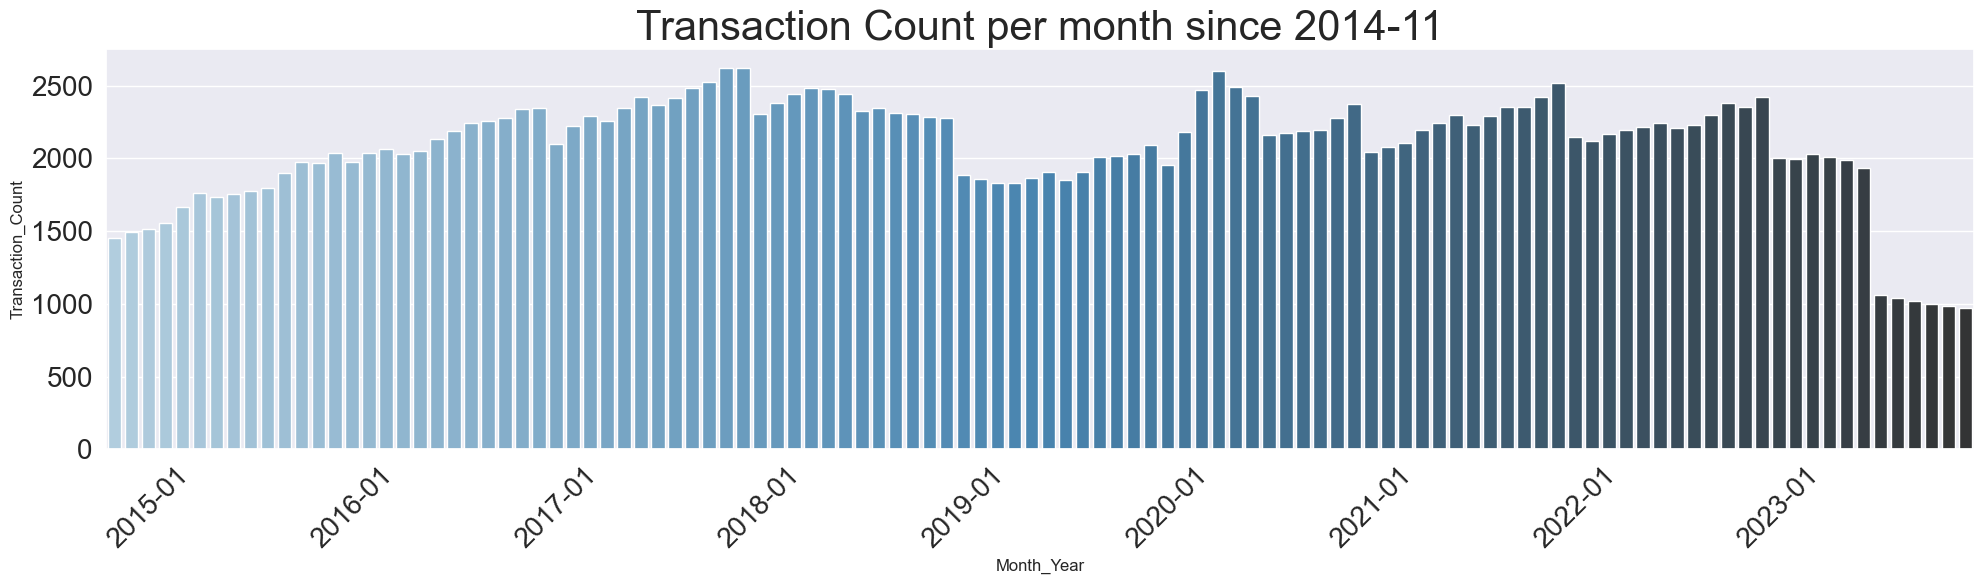

In [76]:
# Extrahiere den Monat und das Jahr aus der "Transaction_Date"-Spalte
df['Month_Year'] = df['premium_startDate'].dt.to_period('M')

# Extrahiere das Jahr aus der "Transaction_Date"-Spalte
df['Year'] = df['premium_startDate'].dt.year

# Gruppiere nach Jahr und Monat und zähle die Anzahl der Transaktionen
df_grouped = df.groupby(['Year', 'Month_Year']).size().reset_index(name='Transaction_Count')

plt_1 = plt.figure(figsize=(20, 6))
# Erstelle das Balkendiagramm mit Aufteilung nach Jahren in Reihen
sns.barplot(x='Month_Year', y='Transaction_Count' ,data=df_grouped, palette="Blues_d")
anzuzeigende_monate = [2, 14, 26, 38,50,62,74,86,98]  # Zum Beispiel: Januar, April, Juli, Oktober

# Passe die X-Achse an und setze die zu zeigenden Monate
plt.xticks(anzuzeigende_monate)
plt.title('Transaction Count per month since 2014-11',fontsize=30)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout();

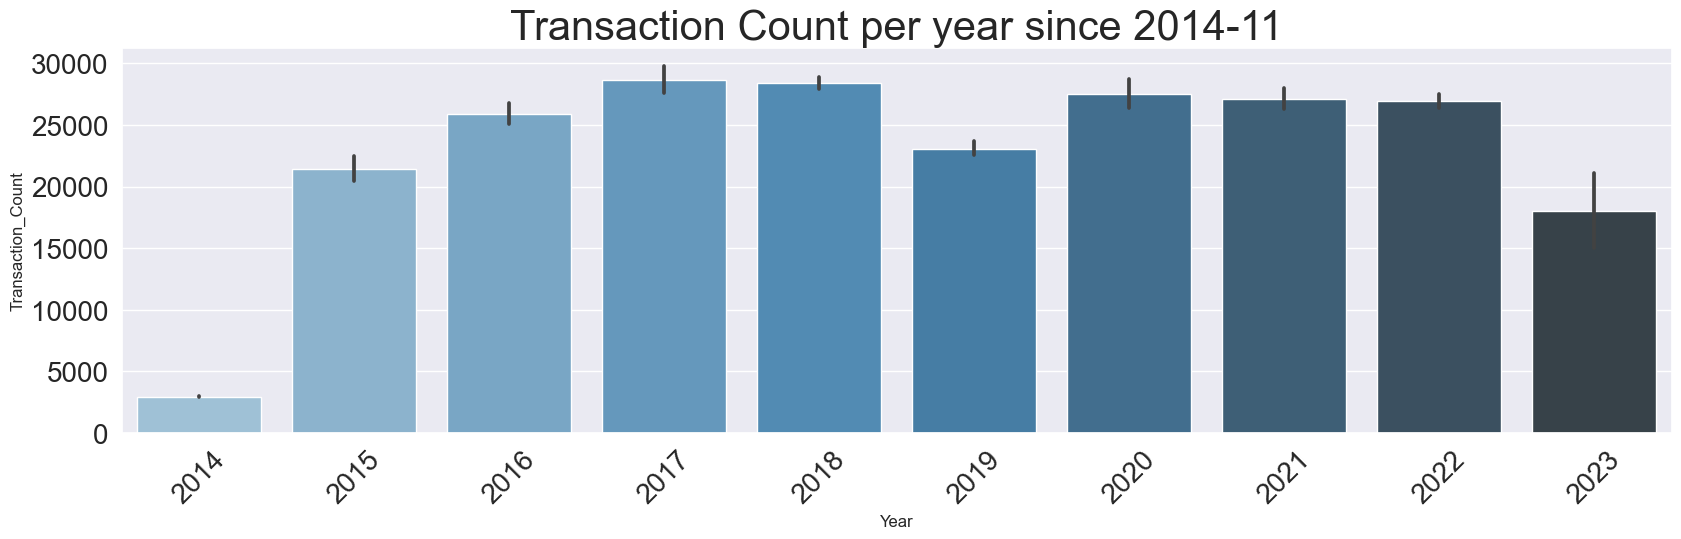

In [80]:
# Erstelle das Balkendiagramm mit Aufteilung nach Jahren in Reihen
sns.barplot(x='Year', y='Transaction_Count' ,data=df_grouped, palette="Blues_d",estimator='sum')
plt.title('Transaction Count per year since 2014-11',fontsize=30)

plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20);

In [85]:
df_sorted = df.sort_values(by='premium_startDate')

In [86]:
df_sorted

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names,Month_Year,Year
100859,P,P,Bezahlt,1982-06-13,RO,32,0,2014-11-01,2014-11-30,2014-09-16,2014-11-30,79.0,31.60,40%,p7553,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43754,P,P,Bezahlt,1970-08-16,DE,44,0,2014-11-01,2014-11-30,2014-04-01,2019-03-31,79.0,31.60,40%,p6286,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,EC,Ecuador,100,Produkte,DE,Americas,40-49,29,2014-11-01,11,2014,Nov,2014-11,2014
57380,P,P,Bezahlt,1982-02-09,RO,32,0,2014-11-01,2014-11-30,2014-03-20,2017-08-31,79.0,31.60,40%,p6458,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43742,P,P,Bezahlt,1982-11-24,DE,31,0,2014-11-01,2014-11-30,2014-09-01,2015-02-28,79.0,31.60,40%,p7403,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,AE,United Arab Emirates,100,Produkte,DE,Asia,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
38835,P,P,Bezahlt,1988-03-12,DE,26,0,2014-11-01,2014-11-30,2014-08-19,2016-01-31,79.0,31.60,40%,p7330,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,DK,Denmark,100,Produkte,DE,Europe,18-29,29,2014-11-01,11,2014,Nov,2014-11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217721,P,S,Storniert,1976-02-03,DE,47,1,2023-12-01,2023-12-31,2022-05-02,2023-01-31,97.0,37.83,39%,p30812,Q055.011.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,RS,Serbia,100,Produkte,DE,Europe,40-49,30,2023-12-01,12,2023,Dec,2023-12,2023
96608,P,P,Bezahlt,1964-12-17,DE,58,3,2023-12-01,2023-12-31,2020-10-01,2025-09-30,97.0,37.83,39%,p25656,Q055.011.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte,DE,Asia,50-59,30,2023-12-01,12,2023,Dec,2023-12,2023
222301,P,P,Bezahlt,1970-04-17,DE,53,4,2023-12-01,2023-12-31,2019-06-04,2024-05-31,97.0,37.83,39%,p21676,Q055.009.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,TH,Thailand,100,Produkte,DE,Asia,50-59,30,2023-12-01,12,2023,Dec,2023-12,2023
31376,P,P,Bezahlt,2013-01-30,DE,10,4,2023-12-01,2023-12-31,2019-07-01,2024-06-30,97.0,37.83,39%,p21761,Q055.009.000,G007,Product6,0.0,I,1008,1009,Ohne USA / CAN / CH,AU,Australia,100,Produkte,DE,Oceania,<18,30,2023-12-01,12,2023,Dec,2023-12,2023


In [88]:
df_sorted.head()

,Indicator,status_code,status_name,BirthDate,Nation,AgeAtPremium,PolicyAgeAtPremium,premium_startDate,premium_endDate,policy_StartDate,policy_EffEndDate,premiumAmount,FeeAmount,feeRate,ContractID,product_code,MainProductCode,MainProductName,Deductible,CmpPrivate,Model,Zone,ZoneDesc,premium_Country,premium_CountryName,product_group,product_groupName,Nation_region,premiumCountry_region,AgeGroup,time_period,MonthYear,month,year,month_names,Month_Year,Year
100859,P,P,Bezahlt,1982-06-13,RO,32,0,2014-11-01,2014-11-30,2014-09-16,2014-11-30,79.0,31.6,40%,p7553,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43754,P,P,Bezahlt,1970-08-16,DE,44,0,2014-11-01,2014-11-30,2014-04-01,2019-03-31,79.0,31.6,40%,p6286,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,EC,Ecuador,100,Produkte,DE,Americas,40-49,29,2014-11-01,11,2014,Nov,2014-11,2014
57380,P,P,Bezahlt,1982-02-09,RO,32,0,2014-11-01,2014-11-30,2014-03-20,2017-08-31,79.0,31.6,40%,p6458,Q055.001.000,G007,Product6,0.0,I,1001,1004,Deutschland,DE,Germany,100,Produkte,Europe,DE,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
43742,P,P,Bezahlt,1982-11-24,DE,31,0,2014-11-01,2014-11-30,2014-09-01,2015-02-28,79.0,31.6,40%,p7403,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,AE,United Arab Emirates,100,Produkte,DE,Asia,30-39,29,2014-11-01,11,2014,Nov,2014-11,2014
38835,P,P,Bezahlt,1988-03-12,DE,26,0,2014-11-01,2014-11-30,2014-08-19,2016-01-31,79.0,31.6,40%,p7330,Q055.001.000,G007,Product6,0.0,I,1001,1002,Ohne USA / CAN,DK,Denmark,100,Produkte,DE,Europe,18-29,29,2014-11-01,11,2014,Nov,2014-11,2014


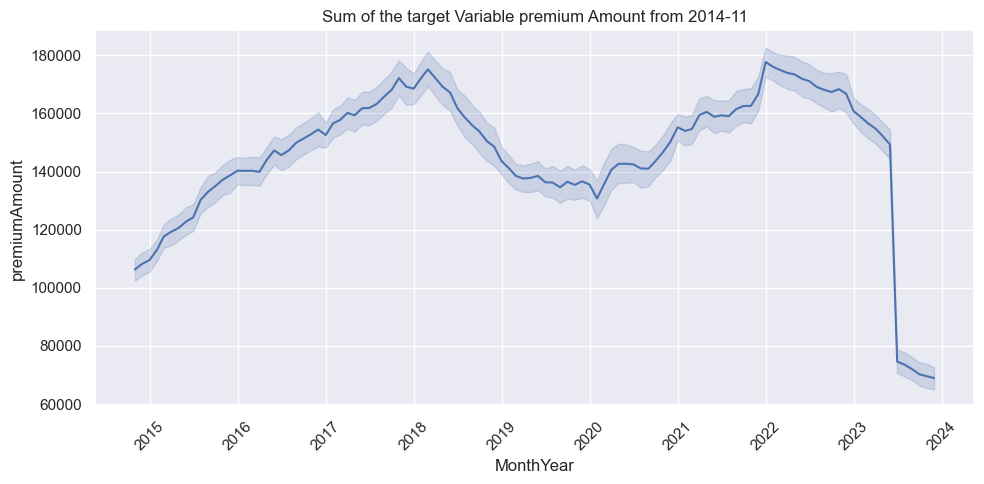

In [114]:
plt.figure(figsize=(10,5))
sns.lineplot(x='MonthYear',y='premiumAmount',data=df_sorted,estimator='sum')
plt.title('Sum of the target Variable premium Amount from 2014-11')
plt.xticks(rotation=45)
plt.tight_layout();